In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

csv = pd.read_csv("car_prices.csv")

In [157]:
#Barchart
@interact
def barplot(x = csv.drop(["make", "mileage", "price", "date"], axis=1).columns, y = csv[["mileage", "price"]].columns):
	
	clear_output(wait=True)
	df = csv.groupby(["make", x]).sum(["price", "mileage"])
	df.reset_index(inplace=True)
	df = df.pivot(index="make", columns=x, values=y)
	ax = df.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="cividis")
	ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.0f}"))
	plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
	plt.show()



interactive(children=(Dropdown(description='x', options=('model', 'year', 'color', 'state'), value='model'), D…

In [3]:
#Wordcloud
@interact
def wcplot(marca = csv["make"].unique()):
	clear_output(wait=True)
	texto = " ".join([mod for mod in csv[csv["make"]==marca]["model"]])
	wc = WordCloud(
		
		width=1500,
		height=1000,
		random_state=1,
		background_color="black",
		colormap="Blues_r",
		collocations=False
		
	).generate(text=texto)
	plt.imshow(wc)
	plt.axis('off')
	plt.show()

interactive(children=(Dropdown(description='marca', options=('Chevrolet', 'Toyota', 'Nissan', 'Ford', 'Honda')…

In [111]:
#Time series
@interact
def line_date_plot(x=csv["make"].unique(), y=csv[["mileage", "price"]].columns, fecha = ["Yearly", "Monthly", "Daily"], hue = csv.drop(["make", "mileage", "price", "date", "year"], axis=1).columns):
  clear_output(wait=True)
  dic = {
    "Yearly": "%Y",
    "Monthly": "%Y-%m",
    "Daily": "%d"
  }
  df = csv[csv["make"]==x]
  df=df.assign(date=pd.to_datetime(df['date']).dt.date)
  df["group"] = df["date"].apply(lambda x: x.strftime(f"{dic[fecha]}"))
  df.sort_values(by="group", inplace=True)
  plt.figure(figsize=(23, 5))
  #I want legend on the right bottom
  sns.lineplot(data=df, x="group", y=y, palette="cividis", hue=hue, linewidth=2.5, ci=25, linestyle="dashed")
  plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
  plt.show()
  
  

interactive(children=(Dropdown(description='x', options=('Chevrolet', 'Toyota', 'Nissan', 'Ford', 'Honda'), va…

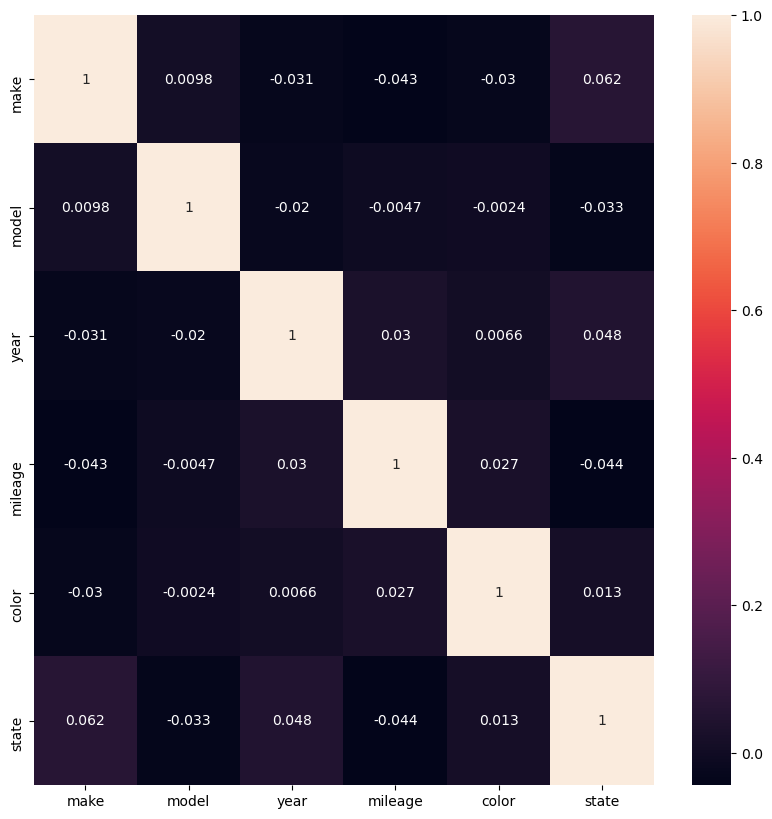

In [110]:
#Correlation


df = csv.copy()
df.drop(["date", "price"], axis=1, inplace=True)
le = LabelEncoder()
for col in df.columns:
  df[col] = le.fit_transform(df[col])
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [176]:
#Boxplot
@interact
def bp(By = csv.drop(["mileage", "price", "date", "year"], axis=1).columns.to_list()):
  clear_output(wait=True)
  df = csv.copy()
  df = df.groupby(By).mean("price")
  df.reset_index(inplace=True)
  df.sort_values(by="price", inplace=True)
  plt.figure(figsize=(10, 10))
  sns.boxplot(data=csv, x=By, y="price")
  plt.show()


interactive(children=(Dropdown(description='By', options=('make', 'model', 'color', 'state'), value='make'), O…

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c', 'd'), value='a'), Output()), _dom_clas…

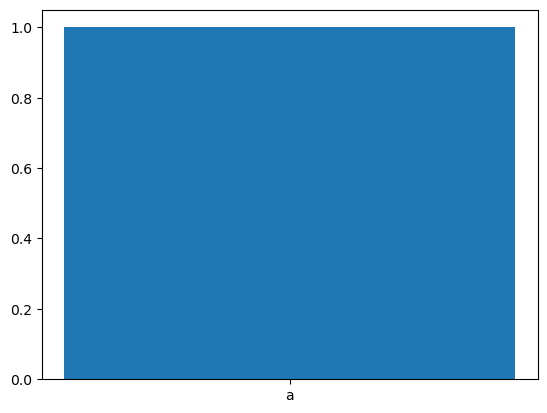

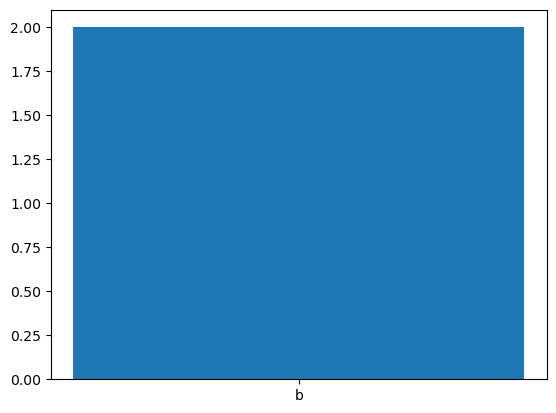

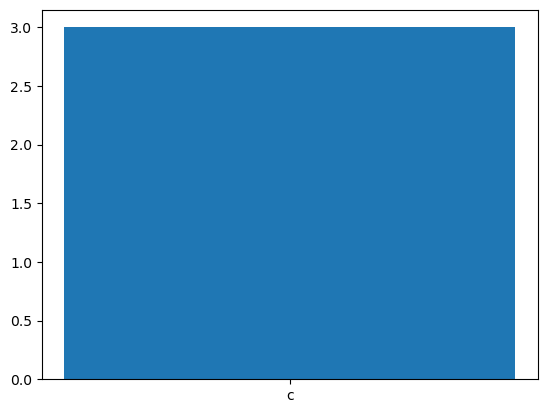

In [195]:
@interact
def pltt(x = ["a", "b", "c", "d"]):
  #create a plot without seaborn
  clear_output(wait=True)
  df = {
    "x": [1,2,3],
    "y": ["a","b","c"]
  }
  df = pd.DataFrame(df)
  fig, ax = plt.subplots()
  df = df[df["y"]==x]
  ax.bar(df["y"], df["x"])
